In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install kaggle

In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

In [5]:
!unzip -l udea-ai-4-eng-20251-pruebas-saber-pro-colombia

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  4716673  2025-03-25 16:54   submission_example.csv
 59185250  2025-03-25 16:54   test.csv
143732449  2025-03-25 16:54   train.csv
---------                     -------
207634372                     3 files


In [6]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [7]:
!ls -lash *.csv

4.5M -rw-r--r-- 1 root root 4.5M Mar 25 16:54 submission_example.csv
 57M -rw-r--r-- 1 root root  57M Mar 25 16:54 test.csv
138M -rw-r--r-- 1 root root 138M Mar 25 16:54 train.csv


In [27]:
dtr = pd.read_csv('train.csv')

In [9]:
dtr.shape

(692500, 21)

In [10]:
dtr.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.553,0.142,0.248,0.175
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Si,...,N,Si,No,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.238,0.316,0.286,0.290
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Educación profesional incompleta,medio-bajo,0.147,0.407,0.212,0.328
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,...,N,Si,Si,Si,Postgrado,alto,0.535,0.122,0.257,0.167


In [15]:
dtr.ESTU_PRGM_ACADEMICO.value_counts()

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
DEPORTE Y ACTIVIDADA FISICA,1
QUIMICA Y FARMACIA,1
"LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES",1


In [11]:
dtr.ESTU_PRGM_DEPARTAMENTO.value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


In [12]:
for i in dtr.columns:
    print ("%20s"%i, np.sum(dtr[i].isna()))

                  ID 0
             PERIODO 0
 ESTU_PRGM_ACADEMICO 0
ESTU_PRGM_DEPARTAMENTO 0
ESTU_VALORMATRICULAUNIVERSIDAD 6287
ESTU_HORASSEMANATRABAJA 30857
FAMI_ESTRATOVIVIENDA 32137
  FAMI_TIENEINTERNET 26629
 FAMI_EDUCACIONPADRE 23178
  FAMI_TIENELAVADORA 39773
 FAMI_TIENEAUTOMOVIL 43623
ESTU_PRIVADO_LIBERTAD 0
ESTU_PAGOMATRICULAPROPIO 6498
FAMI_TIENECOMPUTADOR 38103
FAMI_TIENEINTERNET.1 26629
 FAMI_EDUCACIONMADRE 23664
  RENDIMIENTO_GLOBAL 0
              coef_1 0
              coef_2 0
              coef_3 0
              coef_4 0


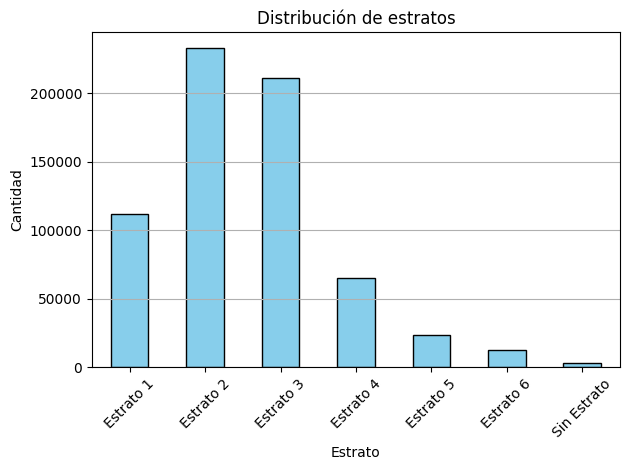

In [23]:
dtr['FAMI_ESTRATOVIVIENDA'] = dtr['FAMI_ESTRATOVIVIENDA'].str.strip()
orden = [
    "Estrato 1", "Estrato 2", "Estrato 3",
    "Estrato 4", "Estrato 5", "Estrato 6",
    "Sin Estrato"
]
frecs = dtr['FAMI_ESTRATOVIVIENDA'].value_counts().reindex(orden)
frecs.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Estrato')
plt.ylabel('Cantidad')
plt.title('Distribución de estratos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()